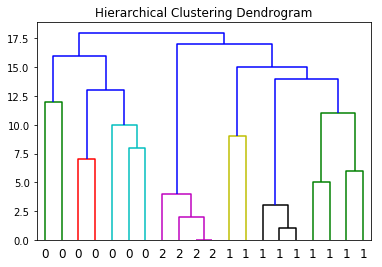

In [1]:
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()


In [16]:
import numpy as np
import pandas as pd
import nltk

import re
import os

from sklearn import feature_extraction

In [84]:
data = open("/home/sangram/AdvancedPython/cluster.txt").read().split('\n')
print(len(data))

1174


In [13]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later

ranks = []

for i in range(0,len(data)):
    ranks.append(i)



In [19]:
# nltk.download()
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')


Next I import the [Snowball Stemmer](http://snowball.tartarus.org/) which is actually part of NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) is just the process of breaking a word down into its root.

In [20]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

elow I define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!



In [21]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized. 

In [25]:
#nltk.download()
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in data:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Using these two lists, I create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For my purposes this is fine--I'm perfectly happy returning the first token associated with the stem I need to look up.

In [26]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

# Count Vectorizer

In [85]:

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.9,min_df=0.05,analyzer='word',stop_words='english')
count_matrix = count_vect.fit_transform(data)
print(count_matrix.shape)
print(count_matrix[0])

Traceback (most recent call last):
  File "<stdin>", line 3, in <module>
NameError: name 'data' is not defined


# Apply Kmeans for num_clusters on count_matrix

In [73]:
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

%time km.fit(count_matrix)

clusters1 = km.labels_.tolist()

CPU times: user 217 ms, sys: 0 ns, total: 217 ms
Wall time: 212 ms


In [74]:
dataset = { 'data': data, 'rank': ranks, 'cluster': clusters1 }
frame = pd.DataFrame(dataset, index = [clusters1] , columns = ['rank','data', 'cluster'])
frame['cluster'].value_counts()

1     128
2     127
8     124
12    113
11     74
5      65
15     64
9      58
17     58
14     53
10     46
3      44
16     41
7      40
4      36
19     32
6      30
13     15
0      14
18     12
Name: cluster, dtype: int64

# Silhouette Analysis

int64
(1174, 23)
For n_clusters = 20 The average silhouette_score is : 0.651571233187


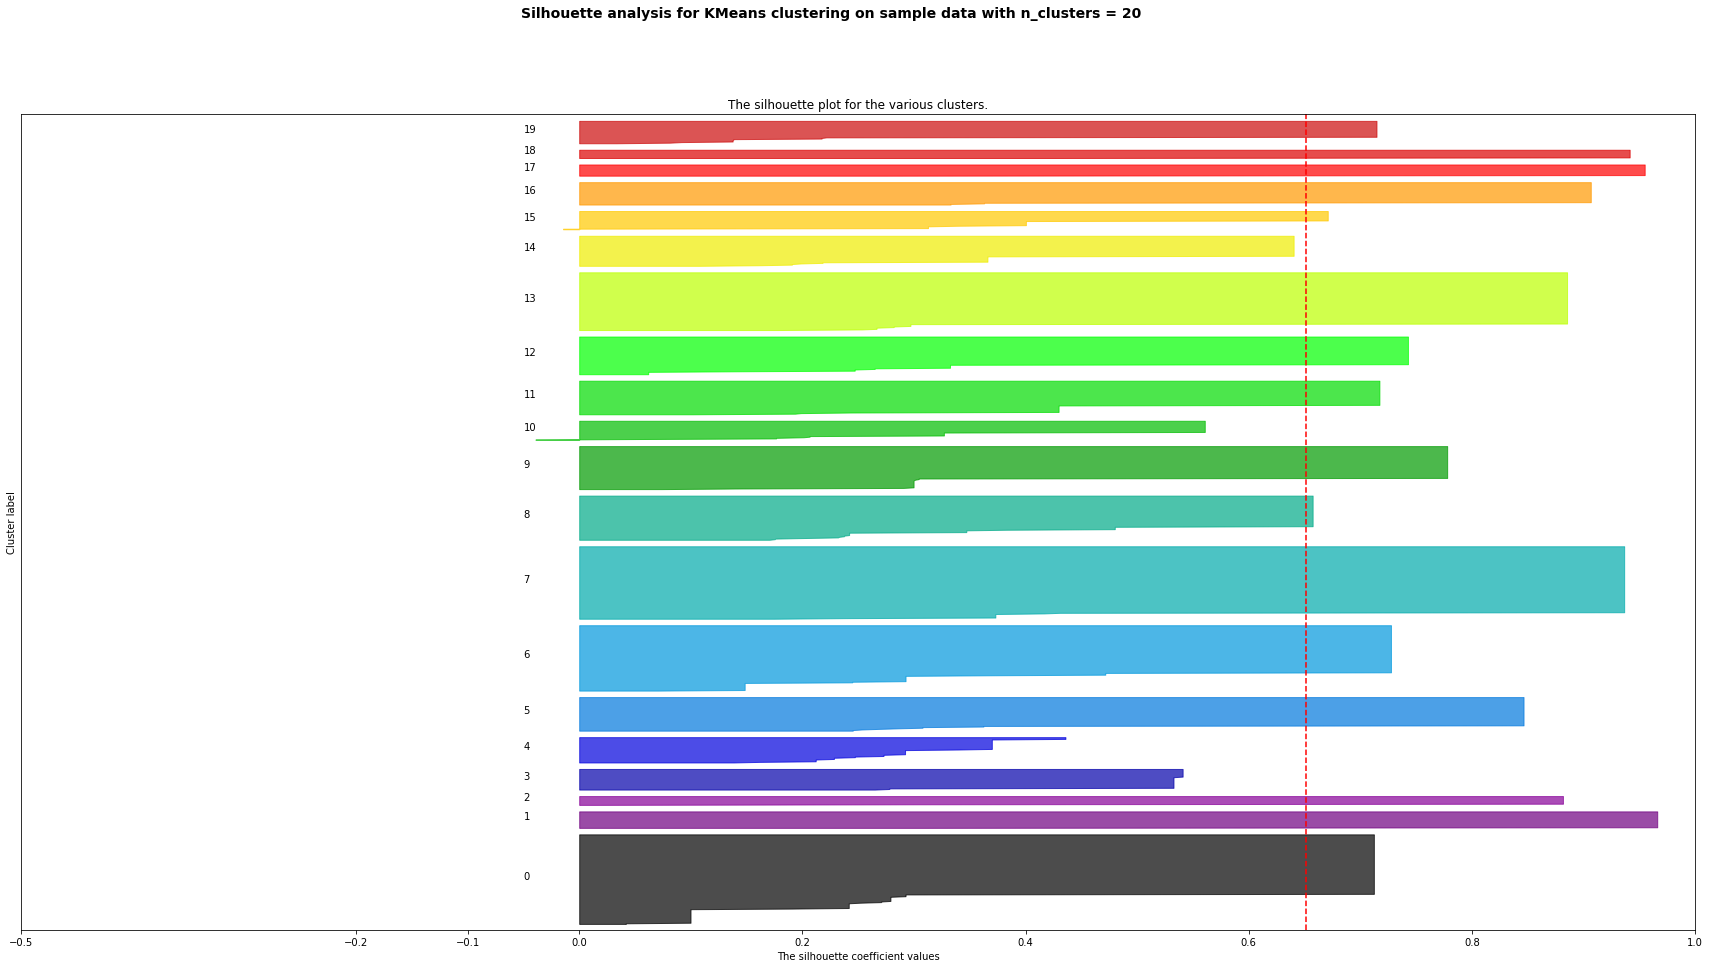

For n_clusters = 21 The average silhouette_score is : 0.676441026695


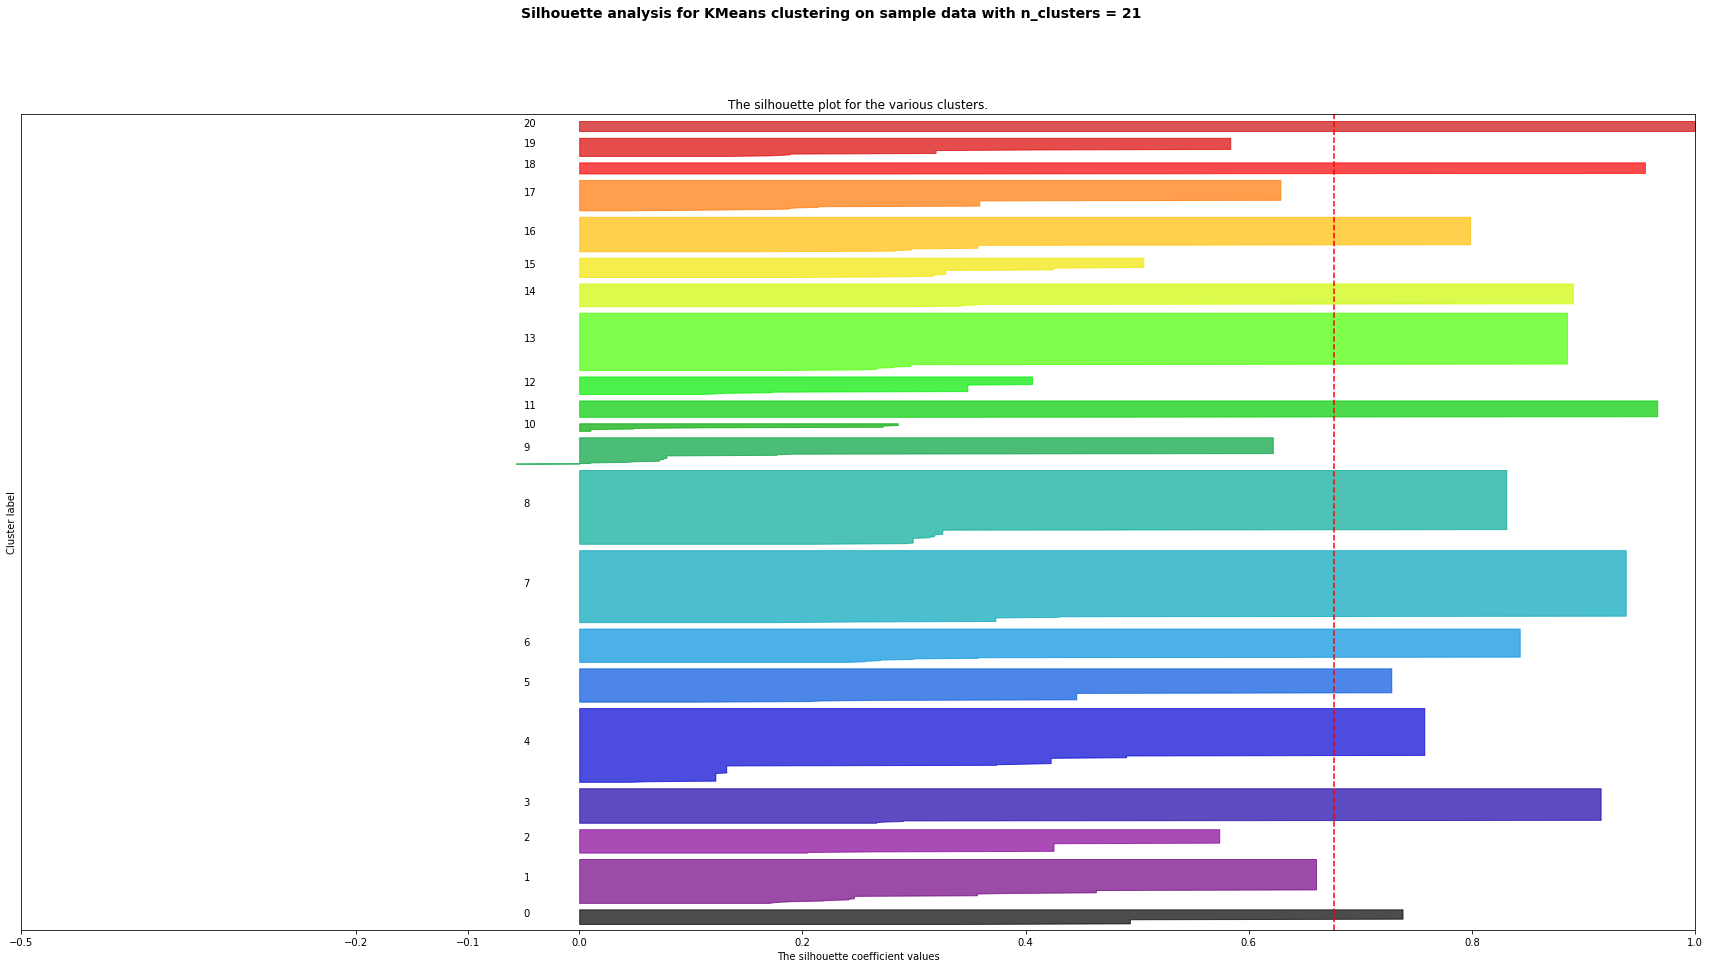

For n_clusters = 22 The average silhouette_score is : 0.67685508067


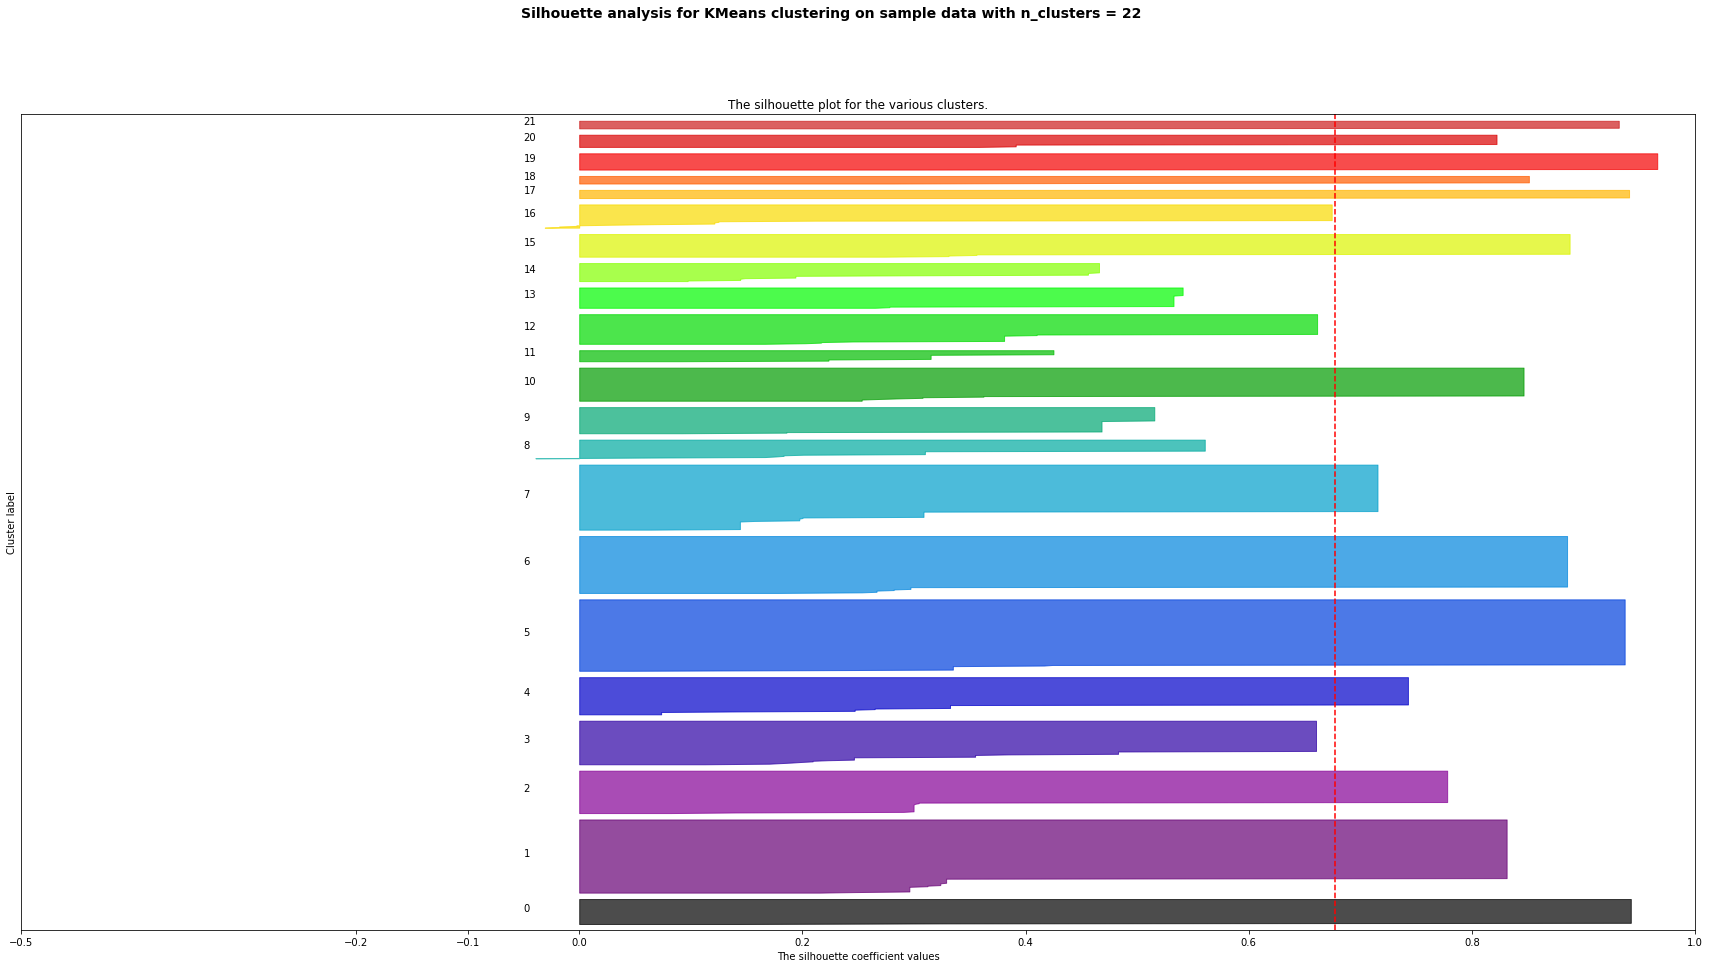

For n_clusters = 23 The average silhouette_score is : 0.684363619561


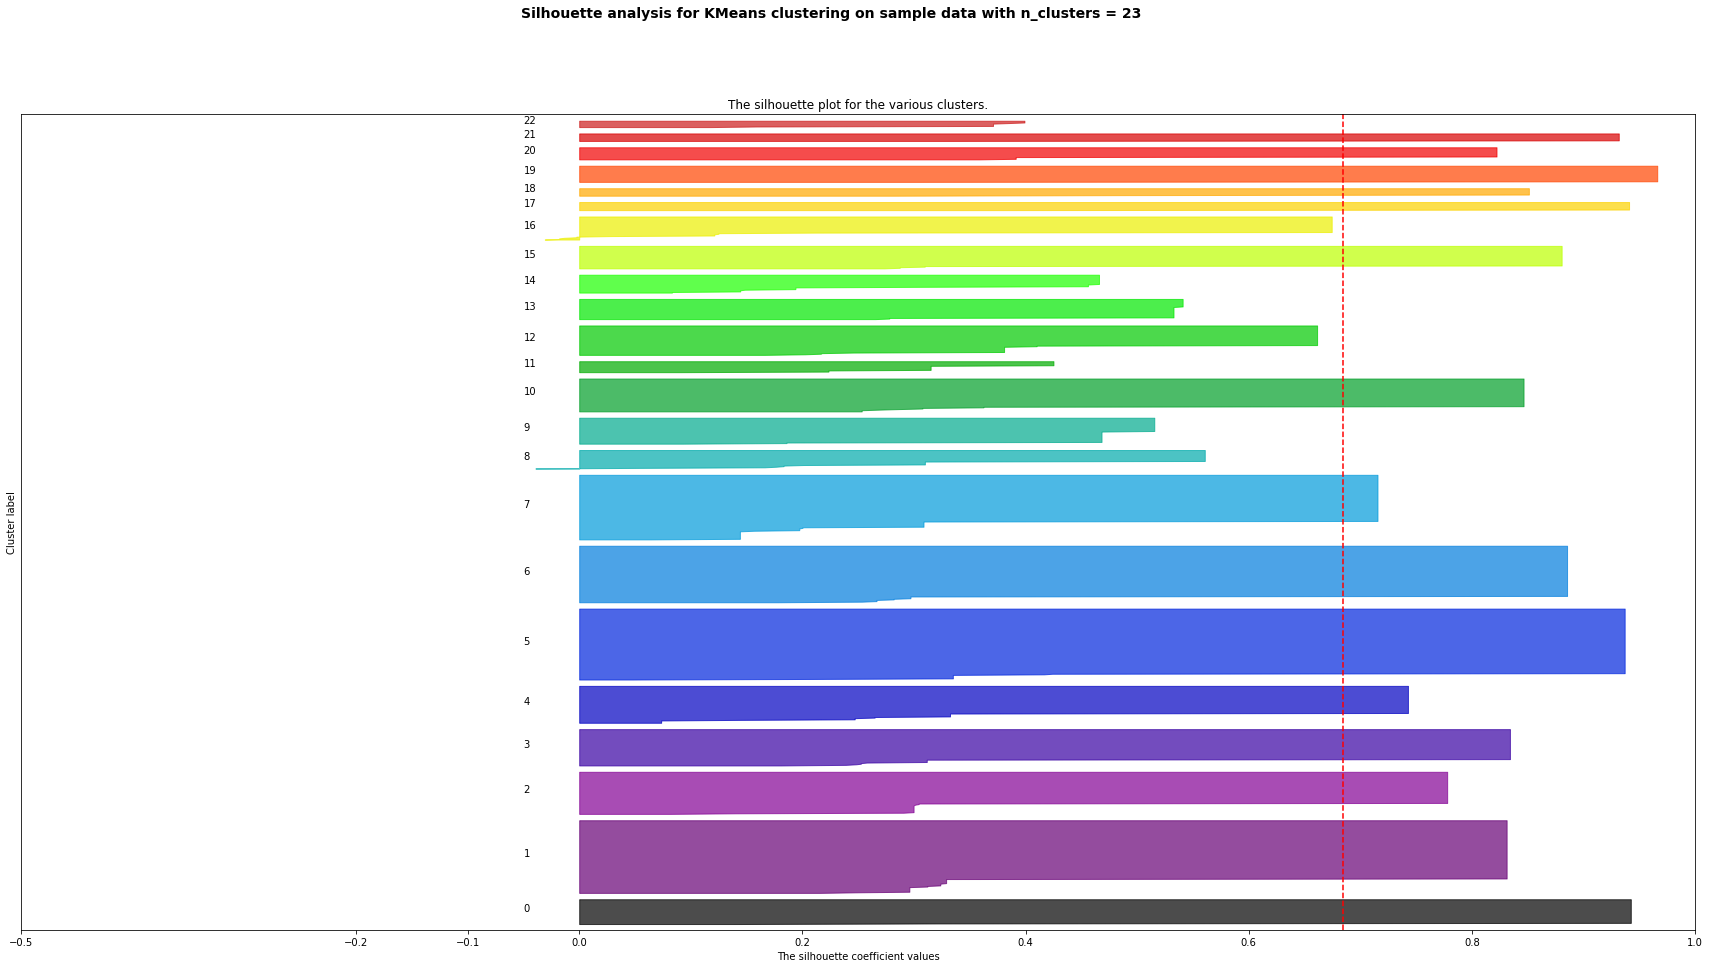

For n_clusters = 24 The average silhouette_score is : 0.696556154061


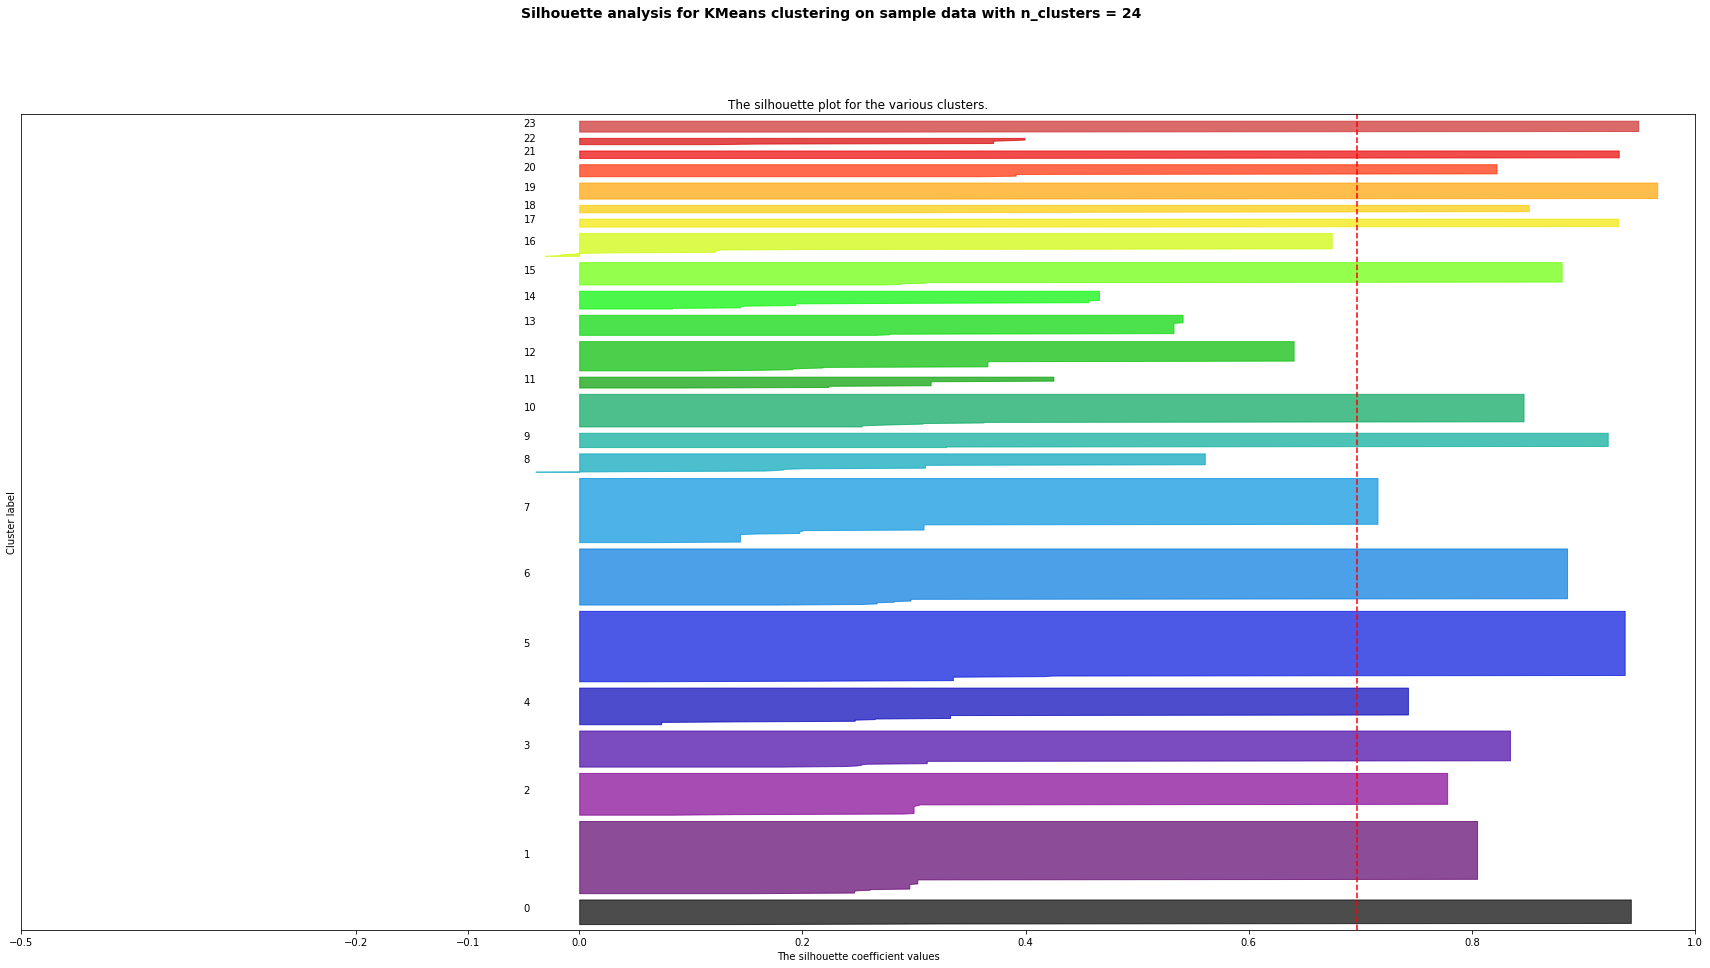

Silhoute Score dictionary
{20: 0.65157123318678267, 21: 0.67644102669472994, 22: 0.6768550806698912, 23: 0.68436361956102254, 24: 0.6965561540605042}


In [109]:
data = open("/home/sangram/AdvancedPython/cluster.txt").read().split('\n')
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.9,min_df=0.05,analyzer='word',stop_words='english')
count_matrix = count_vect.fit_transform(data)
X = count_matrix
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(with_mean=False)
# X_scaled = scaler.fit_transform( X )
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# X = X_scaled

#X = X.toarray()
print(X.dtype)
print(X.shape)
#range_n_clusters = [20, 21, 22, 23, 24]
range_n_clusters = range(20, 25)
score_dictionary = {}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    # set up plot
    fig, ax = plt.subplots(figsize=(30, 15)) # set size
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    #clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity = 'cosine',linkage='complete')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    #dictionary to store silhoute score
    score_dictionary.update({n_clusters:silhouette_avg})
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #print(sample_silhouette_values)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', lw=0, 
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

print("Silhoute Score dictionary")
print(score_dictionary)

# TFIDF Vectorizer
<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Here, I define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the *synopses* list into a tf-idf matrix. 

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters I define below:

<ul>
<li> max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
<li> min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
<li> ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram)
</ul>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(data)

print(tfidf_matrix.shape)

CPU times: user 320 ms, sys: 0 ns, total: 320 ms
Wall time: 314 ms
(1174, 29)


In [41]:
terms = tfidf_vectorizer.get_feature_names()

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)


In [51]:
#print(len(dist[0]))
print(dist[:5][:5])


[[ -2.22044605e-16   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    6.24683842e-01   1.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    8.29269933e-01   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00  -2.22044605e-16 ...,   7.65249685e-01
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   9.97409253e-02
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [43]:
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 254 ms, sys: 0 ns, total: 254 ms
Wall time: 248 ms


In [44]:
dataset = { 'data': data, 'rank': ranks, 'cluster': clusters }
frame = pd.DataFrame(dataset, index = [clusters] , columns = ['rank','data', 'cluster'])

In [45]:
frame['cluster'].value_counts()

2     128
7     126
4     124
6     121
9      79
1      75
12     72
8      72
10     55
14     50
11     43
15     40
0      38
19     34
13     33
5      32
3      22
18     15
16      9
17      6
Name: cluster, dtype: int64